In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from dateutil import parser

In [2]:
df=pd.read_excel("airline_passengers.xlsx")

In [3]:
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)

In [54]:
df.head(4)

,Passenger_ID,Name,Gender,Flight_Number,Booking_Date,Ticket_Price,Class,Seat_Number,Baggage_Weight(kg),Loyalty_Points,Meal_Preference
0,1001,Nancy Campbell,Other,AI235,2023-06-20,450.000000,Economy,17F,35.0,2975,Veg
1,1002,Paul Adams,Female,AI251,2023-05-15,750.000000,First,6C,30.0,1915,Non-Veg
2,1003,Patricia Garcia,Male,AI232,2023-06-20,529.973684,First,30D,30.0,2284,Veg
3,1004,Samuel King,Other,AI275,2023-03-25,750.000000,First,14D,35.0,3036,Veg


In [5]:
df.describe()

,Passenger_ID,Age,Ticket_Price,Baggage_Weight(kg),Loyalty_Points
count,850.00000,424.000000,760.000000,695.000000,850.000000
mean,1425.50000,37.856132,529.973684,24.338129,2547.845882
std,245.51816,12.285822,106.876848,6.884759,1459.963555
min,1001.00000,18.000000,380.000000,15.000000,6.000000
25%,1213.25000,27.000000,450.000000,20.000000,1282.000000
50%,1425.50000,38.000000,500.000000,25.000000,2504.500000
75%,1637.75000,47.000000,590.000000,30.000000,3850.250000
max,1850.00000,60.000000,750.000000,35.000000,4995.000000


# Check duplicate

In [7]:
df.duplicated().sum()

0

No duplicate

# Handle Null Values

In [10]:
df.isna().sum()

Passenger_ID            0
Name                    0
Age                   426
Gender                  0
Flight_Number           0
Booking_Date            0
Ticket_Price           90
Class                   0
Seat_Number             0
Baggage_Weight(kg)    155
Loyalty_Points          0
Meal_Preference       194
dtype: int64

In [11]:
df.shape

(850, 12)

### Delete columns have more than 40% null values

In [13]:
df.columns[df.isna().sum()/df.shape[0]>0.4]

Index(['Age'], dtype='object')

In [14]:
df=df.drop("Age",axis=1)

### Fill null values

In [16]:
df.select_dtypes(exclude='O').columns

Index(['Passenger_ID', 'Ticket_Price', 'Baggage_Weight(kg)', 'Loyalty_Points'], dtype='object')

### int or float type columns'null values change into mean

In [18]:
columns=['Passenger_ID', 'Ticket_Price', 'Baggage_Weight(kg)', 'Loyalty_Points']
df[columns]=df[columns].fillna(df[columns].mean())

In [19]:
df.isnull().sum()

Passenger_ID            0
Name                    0
Gender                  0
Flight_Number           0
Booking_Date            0
Ticket_Price            0
Class                   0
Seat_Number             0
Baggage_Weight(kg)      0
Loyalty_Points          0
Meal_Preference       194
dtype: int64

In [20]:
df["Meal_Preference"].unique()

array(['Veg', 'Non-Veg', 'Vegan', nan], dtype=object)

### Meal_Preference's null value change into veg 

In [22]:
df["Meal_Preference"] = df["Meal_Preference"].fillna("Veg")


In [23]:
df.isna().sum()

Passenger_ID          0
Name                  0
Gender                0
Flight_Number         0
Booking_Date          0
Ticket_Price          0
Class                 0
Seat_Number           0
Baggage_Weight(kg)    0
Loyalty_Points        0
Meal_Preference       0
dtype: int64

In [24]:
df.head()

,Passenger_ID,Name,Gender,Flight_Number,Booking_Date,Ticket_Price,Class,Seat_Number,Baggage_Weight(kg),Loyalty_Points,Meal_Preference
0,1001,Nancy Campbell,Other,AI235,2023/06/20,450.000000,Economy,17F,35.0,2975,Veg
1,1002,Paul Adams,Female,AI251,15-05-2023,750.000000,First,6C,30.0,1915,Non-Veg
2,1003,Patricia Garcia,Male,AI232,2023/06/20,529.973684,First,30D,30.0,2284,Veg
3,1004,Samuel King,Other,AI275,03/25/2023,750.000000,First,14D,35.0,3036,Veg
4,1005,Samuel King,Male,AI236,2023/06/20,450.000000,Business,28D,15.0,3035,Veg


# Date Format Standardization

In [26]:
df['Booking_Date'] = df['Booking_Date'].astype(str).apply(lambda x: parser.parse(x, dayfirst=True).strftime('%Y-%m-%d') if x.strip() else x)

In [47]:
df.head()

,Passenger_ID,Name,Gender,Flight_Number,Booking_Date,Ticket_Price,Class,Seat_Number,Baggage_Weight(kg),Loyalty_Points,Meal_Preference
0,1001,Nancy Campbell,Other,AI235,2023-06-20,450.000000,Economy,17F,35.0,2975,Veg
1,1002,Paul Adams,Female,AI251,2023-05-15,750.000000,First,6C,30.0,1915,Non-Veg
2,1003,Patricia Garcia,Male,AI232,2023-06-20,529.973684,First,30D,30.0,2284,Veg
3,1004,Samuel King,Other,AI275,2023-03-25,750.000000,First,14D,35.0,3036,Veg
4,1005,Samuel King,Male,AI236,2023-06-20,450.000000,Business,28D,15.0,3035,Veg


### All Data are Cleaned

# Exploratory Data Analysis

C:\Users\user\AppData\Local\Temp\ipykernel_19196\2914195959.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='coolwarm')


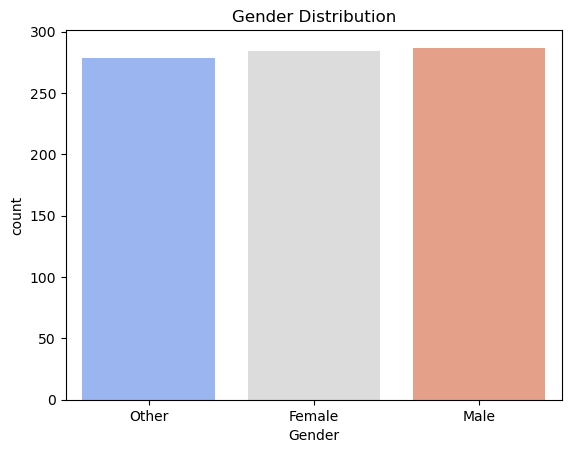

In [61]:
#Gender Distribution
sns.countplot(x='Gender', data=df, palette='coolwarm')
plt.title('Gender Distribution')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_19196\3622591199.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='Set2')


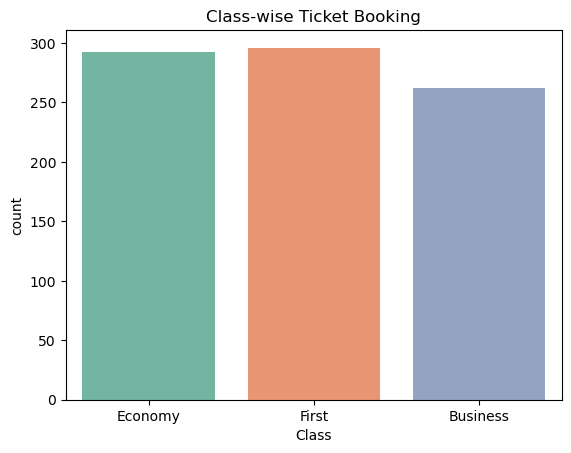

In [63]:
sns.countplot(x='Class', data=df, palette='Set2')
plt.title('Class-wise Ticket Booking')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_19196\358532041.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Meal_Preference', data=df, palette='viridis')


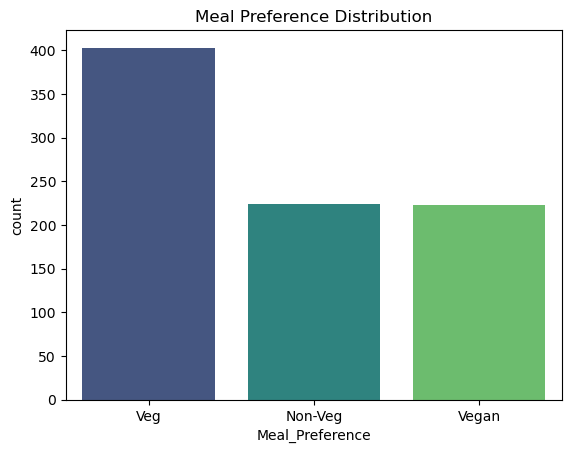

In [65]:
sns.countplot(x='Meal_Preference', data=df, palette='viridis')
plt.title('Meal Preference Distribution')
plt.show()

## Key insights

### Most Frequently Booked Flights

In [70]:
print(df['Flight_Number'].value_counts().head(5))


Flight_Number
AI293    16
AI236    16
AI263    15
AI215    14
AI211    14
Name: count, dtype: int64


### Most Popular Travel Class

In [73]:
print(df['Class'].value_counts())


Class
First       296
Economy     292
Business    262
Name: count, dtype: int64


# Recommendations Based on Data Insights

### Top Booked Flights:

AI293, AI236, AI263, AI215, AI211 are the most frequently booked flights.

These routes likely have a high number of frequent travelers, so airlines should increase flight frequency or deploy larger aircraft to meet demand.

Airlines can introduce premium services or special offers on these routes to maximize revenue.

### Class-wise Demand: Adjust Pricing & Offers

First Class (296), Economy (292), Business (262)

Demand for all three classes is nearly equal, but First Class has the highest number of bookings.

Airlines should enhance luxury services and introduce premium packages to attract more First-Class passengers.

Economy Class consists of budget travelers, so airlines should introduce discounted short-haul tickets and group discounts to attract more customers.

### Revenue Maximization Strategies
### Dynamic Pricing & Seasonal Adjustments:



If a flight route has high demand, airlines should implement dynamic pricing (gradually increasing ticket prices as demand rises).

During peak seasons, First Class and Business Class tickets can be priced higher to maximize profits.

###  Customer Engagement & Loyalty Programs
### Special Offers for Frequent Flyers:

Passengers frequently traveling on high-demand flights should be offered special loyalty rewards.

Premium and Business Class travelers can be provided free lounge access, extra baggage allowances, and upgrade offers to increase customer satisfaction.